<a href="https://colab.research.google.com/github/Zernach/EEG_Data_Exploration/blob/master/EEG_Dataset_Compilations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


# Define a function for pulling in txt data from EEG device and cleaning it up

In [0]:
def Wrangle(url_list):
  
  column_names = ['index', 'channel1','channel2', 'channel3', 'channel4', 'accel1', 'accel2', 'accel3', 'timestamp', 'aux']
  dropped_row_indices = [0, 1, 2, 3, 4, 5]
  df_list = []

  for url in url_list:
    df = pd.read_csv(url, sep=',', header=None, names=column_names)
    df = df.drop(dropped_row_indices, axis=0).reset_index()
    df = df.drop(['level_0', 'index', 'timestamp'], axis=1)
    df = df.dropna(axis=0)
    df_list.append(df)
    
  return df_list

In [0]:
column_names = ['index', 'channel1','channel2', 'channel3', 'channel4', 'accel1', 'accel2', 'accel3', 'timestamp', 'aux']

# Import all of the data, which came from Milecia in separate .txt files. Run each file through the Wrangle function to obtain cleaned dataframes. Then, assign values to the six commands: no, yes, up, down, left, right.

In [0]:
url_list_no = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no0.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no2.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no3.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no4.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no5.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no6.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no8.txt']
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-no9.txt']

url_list_yes = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes0.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes2.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes3.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes4.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes5.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes6.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes8.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-yes9.txt']

url_list_up = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up0.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up2.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up3.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up4.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up5.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up6.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up8.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-up9.txt']

url_list_down = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down0.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down2.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down3.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down4.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down5.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down6.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down8.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-down9.txt']

url_list_left = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left0.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left2.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left3.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left4.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left5.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left6.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left8.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-left9.txt']

url_list_right = ['https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right0.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right1.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right2.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right3.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right4.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right5.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right6.txt',
               #'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right7.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right8.txt',
               'https://archlife.org/wp-content/uploads/2020/03/OpenBCI-RAW-right9.txt']

In [0]:
df_no0, df_no1, df_no2, df_no3, df_no4, df_no6, df_no8 = Wrangle(url_list_no)

df_yes0, df_yes1, df_yes2, df_yes3, df_yes4, df_yes5, df_yes6, df_yes8, df_yes9 = Wrangle(url_list_yes)

df_up0, df_up1, df_up2, df_up3, df_up4, df_up5, df_up6, df_up7, df_up8, df_up9 = Wrangle(url_list_up)

df_down0, df_down1, df_down2, df_down3, df_down4, df_down6, df_down7, df_down8, df_down9 = Wrangle(url_list_down)

df_left0, df_left1, df_left2, df_left3, df_left4, df_left5, df_left6, df_left7, df_left8, df_left9 = Wrangle(url_list_left)

df_right0, df_right2, df_right5, df_right8, df_right9 = Wrangle(url_list_right)

In [0]:
df_yes0

,channel1,channel2,channel3,channel4,accel1,accel2,accel3,aux
0,-60.98,212.52,-173.90,-165.73,0.000,0.000,0.000,1.583417e+12
1,69.70,135.07,275.70,234.32,0.000,0.000,0.000,1.583417e+12
2,14.93,-30.40,179.79,187.84,0.000,0.000,0.000,1.583417e+12
3,-95.88,154.76,-264.09,-210.09,0.000,0.000,0.000,1.583417e+12
4,31.56,197.55,141.62,96.61,0.000,0.000,0.000,1.583417e+12
...,...,...,...,...,...,...,...,...
922,-67.95,-76.63,6001.55,149.18,0.016,-0.016,-1.008,1.583417e+12
923,-186.99,85.79,5551.13,-281.12,0.016,-0.016,-1.008,1.583417e+12
924,-53.09,163.89,5938.22,19.74,0.016,-0.016,-1.008,1.583417e+12
925,-6.82,-38.31,6178.37,252.79,0.016,-0.016,-1.008,1.583417e+12


In [0]:
df_no = pd.concat([df_no1, df_no2, df_no3, df_no4, df_no6, df_no8]).reset_index()
df_no = df_no.drop(['index'], axis=1)

df_yes = pd.concat([df_yes1, df_yes2, df_yes3, df_yes4, df_yes5, df_yes6, df_yes8, df_yes9]).reset_index()
df_yes = df_yes.drop(['index'], axis=1)

df_up = pd.concat([df_up1, df_up2, df_up3, df_up4, df_up5, df_up6, df_up7, df_up8, df_up9]).reset_index()
df_up = df_up.drop(['index'], axis=1)

df_down = pd.concat([df_down1, df_down2, df_down3, df_down4, df_down6, df_down7, df_down8, df_down9]).reset_index()
df_down = df_down.drop(['index'], axis=1)

df_left = pd.concat([df_left1, df_left2, df_left3, df_left4, df_left5, df_left6, df_left7, df_left8, df_left9]).reset_index()
df_left = df_left.drop(['index'], axis=1)

df_right = pd.concat([df_right2, df_right5, df_right8, df_right9]).reset_index()
df_right = df_right.drop(['index'], axis=1)

In [0]:
df_no['command'] = 0
df_yes['command'] = 1
df_up['command'] = 2
df_down['command'] = 3
df_left['command'] = 4
df_right['command'] = 5

# Merge the datasets into one full_df — so a model can be trained on it

In [0]:
full_df = pd.concat([df_no, df_yes, df_up, df_down, df_left, df_right]).reset_index()
full_df = full_df.drop(['index'], axis=1)
full_df

,channel1,channel2,channel3,channel4,accel1,accel2,accel3,aux,command
0,-153.44,-215.40,-174.17,-207.44,0.016,-0.016,-1.024,1.583418e+12,0
1,-129.76,-158.32,-131.10,-110.77,0.016,-0.016,-1.024,1.583418e+12,0
2,-29.63,-134.79,109.96,164.04,0.016,-0.016,-1.024,1.583418e+12,0
3,-132.17,-210.60,-123.15,-101.03,0.016,-0.016,-1.024,1.583418e+12,0
4,-178.40,-183.37,-193.69,-263.85,0.016,-0.016,-1.024,1.583418e+12,0
...,...,...,...,...,...,...,...,...,...
45805,-178.73,-134.35,-243.08,-412.54,0.016,-0.016,-1.008,1.583419e+12,5
45806,-112.91,-71.50,-59.68,-1.59,0.016,-0.016,-1.008,1.583419e+12,5
45807,-104.39,-78.58,8.94,68.95,0.016,-0.016,-1.024,1.583419e+12,5
45808,-171.55,-138.96,-193.75,-334.05,0.016,-0.016,-1.024,1.583419e+12,5


In [0]:
full_df['channel1'].max()

417.19

# Export Merged full_df to CSV file

In [0]:
full_df.to_csv('yes_no_up_down_left_right_100_1_second_bursts.csv')

# Exploratory Analysis

In [0]:
import seaborn as sns
import matplotlib as plt

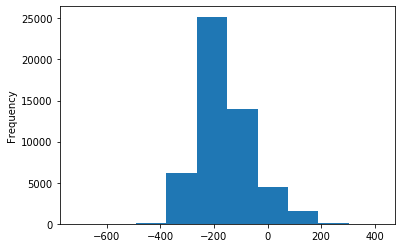

In [0]:
full_df['channel1'].plot.hist()

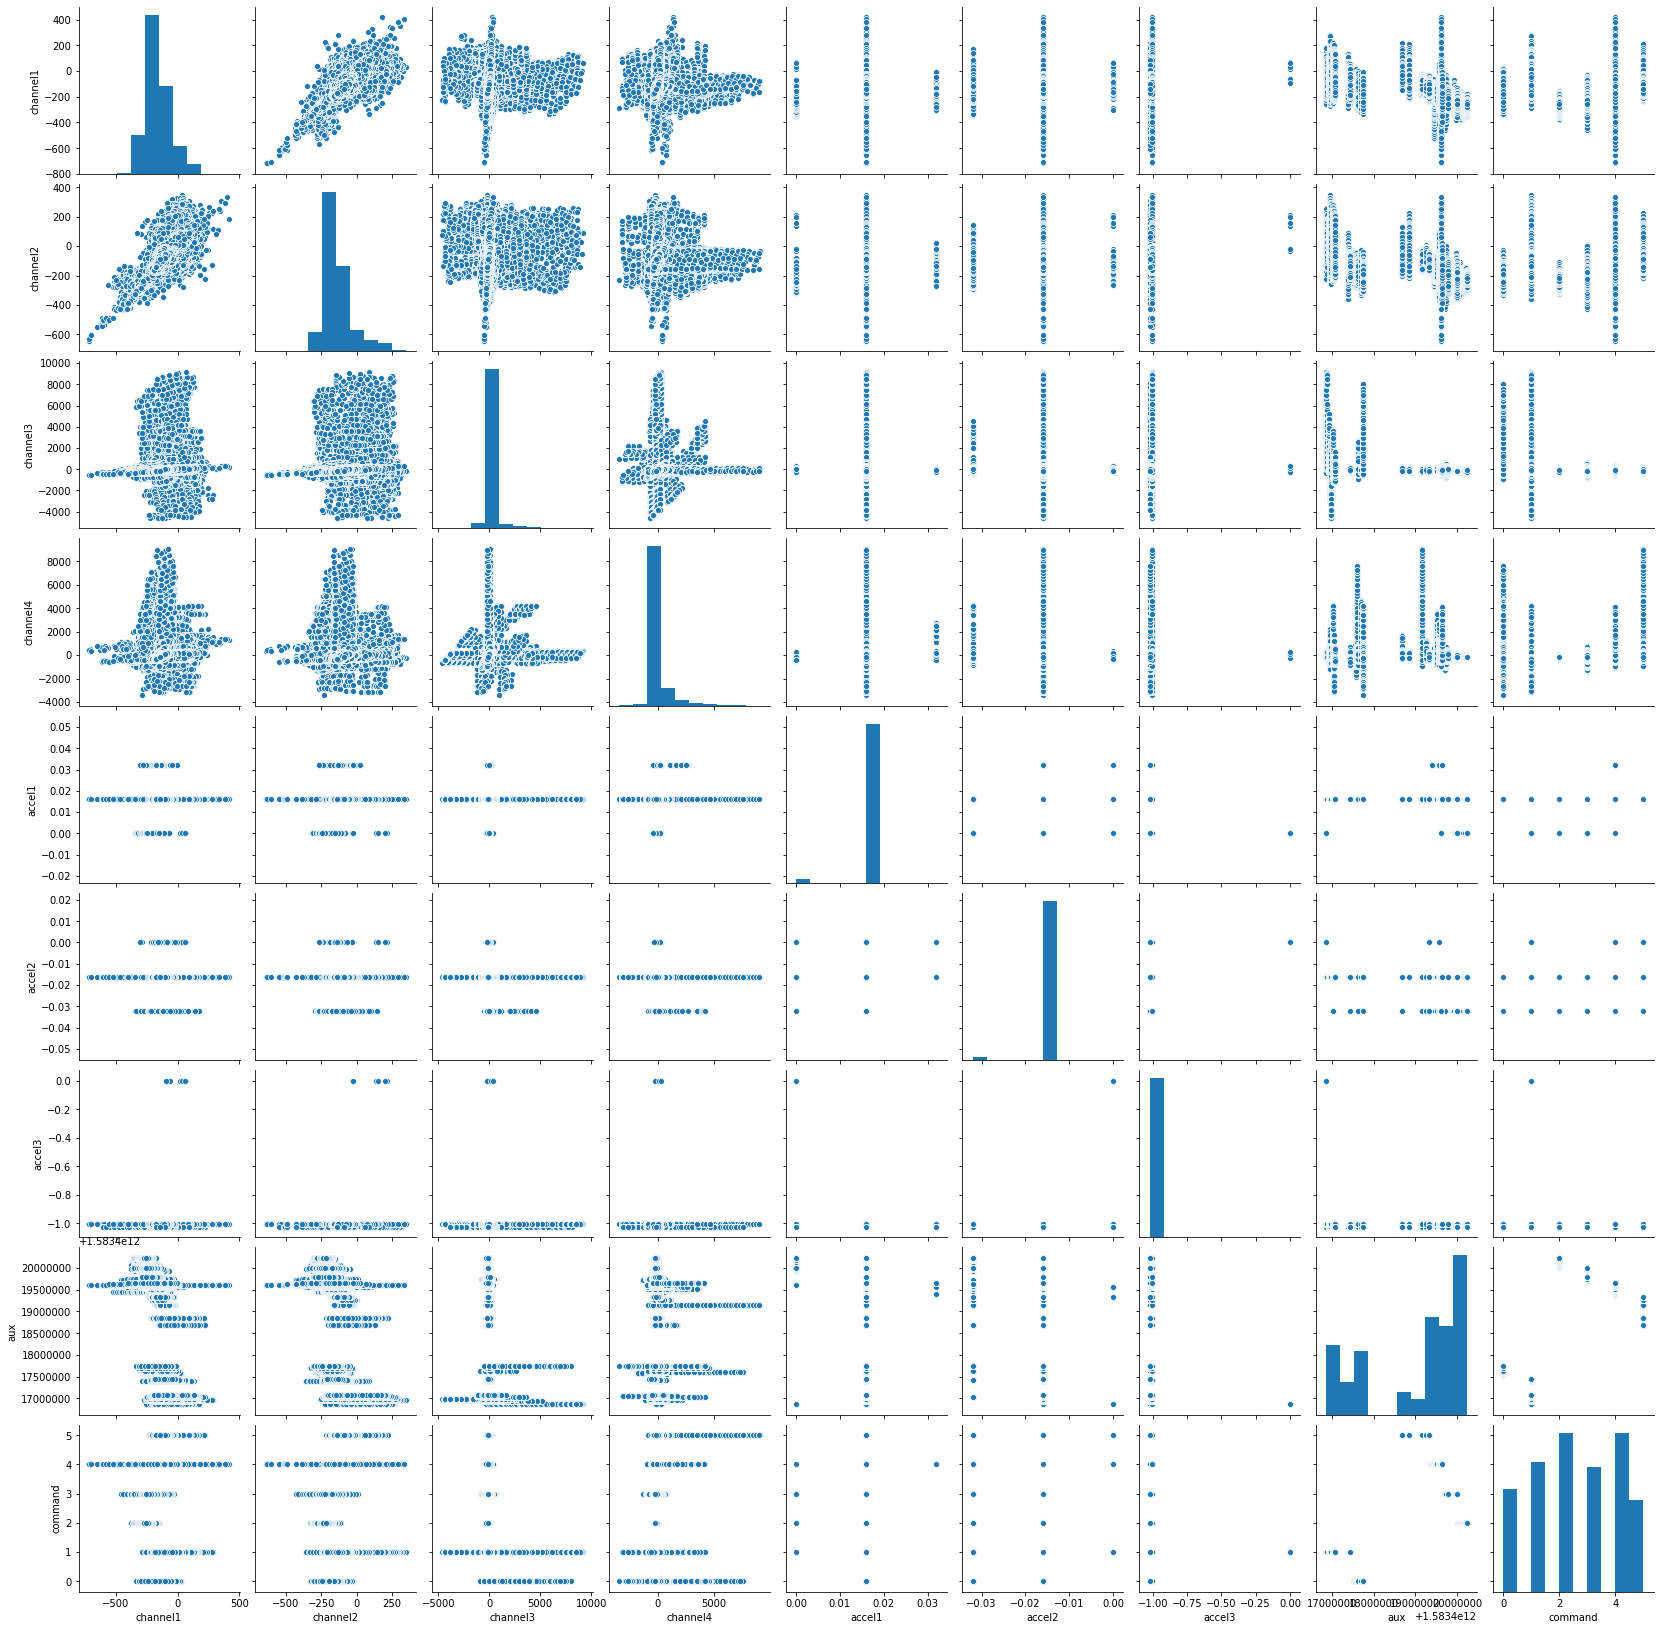

In [0]:
sns.pairplot(full_df)

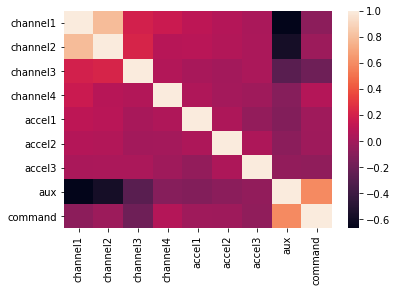

In [0]:
heatdata = full_df.corr()
sns.heatmap(heatdata)

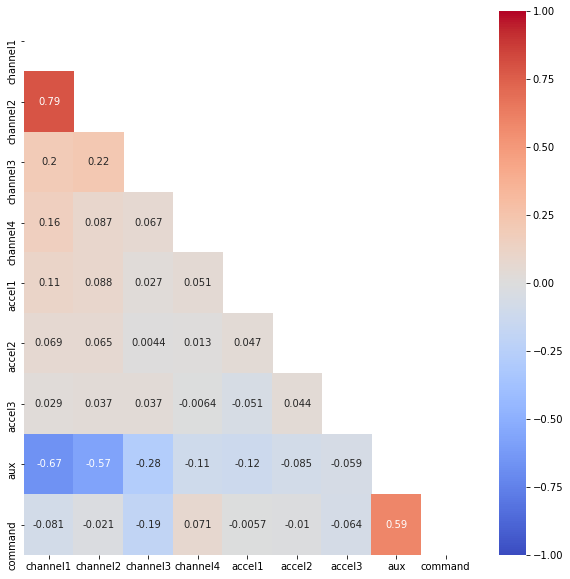

In [0]:
import matplotlib.pyplot as plt
mask = np.zeros_like(heatdata, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(heatdata,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

# Train a model to predict which command is being made by the user's brain signals!

In [0]:
train, test = train_test_split(full_df, train_size=0.75, test_size=0.25, stratify=full_df['command'], random_state=42)

In [0]:
target = 'command'
features = full_df.drop(columns=[target]).columns

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
)

pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
y_pred = pipeline.predict(x_test)
print('Test Data Classification Accuracy = ', accuracy_score(y_test, y_pred))

Test Data Classification Accuracy =  0.9764253907273204


# Another visualization, but this one is of the feature importances

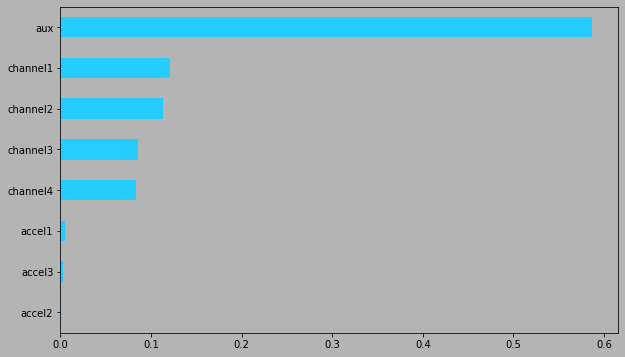

In [0]:
# Get feature importances
model = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6), facecolor = '#b4b4b4')
ax.set(facecolor='#b4b4b4')
#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff');

# More test data from Milecia to test on the model

In [0]:
pred_no = pipeline.predict(df_no0)
pred_yes = pipeline.predict(df_yes0)
pred_up = pipeline.predict(df_up0)
pred_down = pipeline.predict(df_down0)
pred_left = pipeline.predict(df_left0)
pred_right = pipeline.predict(df_right0)

In [0]:
print(df_no0.shape)
print(df_yes0.shape)
print(df_up0.shape)
print(df_down0.shape)
print(df_left0.shape)
print(df_right0.shape)

print(df_no2.shape)
print(df_yes2.shape)
print(df_up2.shape)
print(df_down2.shape)
print(df_left2.shape)
print(df_right2.shape)

print(df_no8.shape)
print(df_yes8.shape)
print(df_up8.shape)
print(df_down8.shape)
print(df_left8.shape)
print(df_right8.shape)

(915, 8)
(927, 8)
(933, 8)
(991, 8)
(973, 8)
(1012, 8)
(1130, 8)
(907, 8)
(1006, 8)
(1134, 8)
(1176, 8)
(1110, 8)
(1108, 8)
(1064, 8)
(975, 8)
(1219, 8)
(1042, 8)
(1339, 8)


# COMMAND PREDICTION — Find the predictions with the highest frequencies in the new test data

In [0]:
# COMMAND NO
commands_df1 = pd.DataFrame({'index': df_no0.index, 'predictions':pred_no})
commands_df1['predictions'] = commands_df1['predictions'].astype('int64')
command_count1 = commands_df1['predictions'].value_counts()
ccdf1 = pd.DataFrame({'index': command_count1.index, 'predictions':command_count1})
preds1 = ccdf1['index'].values
print('Dataset NO is thinking: ', preds1[0])

# COMMAND YES
commands_df2 = pd.DataFrame({'index': df_yes0.index, 'predictions':pred_yes})
commands_df2['predictions'] = commands_df2['predictions'].astype('int64')
command_count2 = commands_df2['predictions'].value_counts()
ccdf2 = pd.DataFrame({'index': command_count2.index, 'predictions':command_count2})
preds2 = ccdf2['index'].values
print('Dataset YES is thinking: ', preds2[0])

# COMMAND UP
commands_df3 = pd.DataFrame({'index': df_up0.index, 'predictions':pred_up})
commands_df3['predictions'] = commands_df3['predictions'].astype('int64')
command_count3 = commands_df3['predictions'].value_counts()
ccdf3 = pd.DataFrame({'index': command_count3.index, 'predictions':command_count3})
preds3 = ccdf3['index'].values
print('Dataset UP is thinking: ', preds3[0])

# COMMAND DOWN
commands_df4 = pd.DataFrame({'index': df_down0.index, 'predictions':pred_down})
commands_df4['predictions'] = commands_df4['predictions'].astype('int64')
command_count4 = commands_df4['predictions'].value_counts()
ccdf4 = pd.DataFrame({'index': command_count4.index, 'predictions':command_count4})
preds4 = ccdf4['index'].values
print('Dataset DOWN is thinking: ', preds4[0])

# COMMAND LEFT
commands_df5 = pd.DataFrame({'index': df_left0.index, 'predictions':pred_left})
commands_df5['predictions'] = commands_df5['predictions'].astype('int64')
command_count5 = commands_df5['predictions'].value_counts()
ccdf5 = pd.DataFrame({'index': command_count5.index, 'predictions':command_count5})
preds5 = ccdf5['index'].values
print('Dataset LEFT is thinking: ', preds5[0])

# COMMAND RIGHT
commands_df6 = pd.DataFrame({'index': df_right0.index, 'predictions':pred_right})
commands_df6['predictions'] = commands_df6['predictions'].astype('int64')
command_count6 = commands_df6['predictions'].value_counts()
ccdf6 = pd.DataFrame({'index': command_count6.index, 'predictions':command_count6})
preds6 = ccdf6['index'].values
print('Dataset RIGHT is thinking: ', preds6[0])

Dataset NO is thinking:  0
Dataset YES is thinking:  1
Dataset UP is thinking:  2
Dataset DOWN is thinking:  3
Dataset LEFT is thinking:  4
Dataset RIGHT is thinking:  5


In [0]:
print(preds1)
print(preds2)
print(preds3)
print(preds4)
print(preds5)
print(preds6)

[0]
[1]
[2 3]
[3]
[4 5]
[5 0]


In [0]:
ccdf6

,index,predictions
5,5,1010
0,0,2


# Export Model as a joblib file

In [0]:
from joblib import dump
dump(pipeline, 'pipeline1.joblib', compress=9)

['pipeline1.joblib']

# Neural Network base Model — probably not necessary because RandomForestClassifier is so accurate

In [0]:
seed = 7
np.random.seed(seed)

# Important Hyperparameters -->
batch_size = 10
number_of_features = 8
epochs = 100
optimizer = 'adadelta'
loss='sparse_categorical_crossentropy'

# MODEL INSTANTIATION -->
model = Sequential()

# INPUT LAYER -->
model.add(Dense(8, input_dim=8, activation='sigmoid'))

# HIDDEN LAYERS -->
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# OUTPUT LAYER -->
model.add(Dense(6,activation='sigmoid'))

#Compile -->
model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=['accuracy'])

# CALLBACK FUNCTION -->
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(x_train,
                    y_train, 
                    epochs=epochs,
                    callbacks=callbacks,
                    #verbose=0,
                    batch_size=batch_size
                    )

model.summary()

Train on 26201 samples
Epoch 1/100
26201/26201 [==============================] - 6s 238us/sample - loss: 1.7917 - acc: 0.2319
Epoch 2/100
  630/26201 [..............................] - ETA: 6s - loss: 1.7916 - acc: 0.2190

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


26201/26201 [==============================] - 6s 236us/sample - loss: 1.7915 - acc: 0.2335
Epoch 3/100
19000/26201 [====================>.........] - ETA: 1s - loss: 1.7914 - acc: 0.2323

KeyboardInterrupt: ignored